In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('..'))
from backtracking import resolver
from greedy_pakku import greedy_pakku
from aproximacion import greedy_ffd
from prog_lineal import prog_lineal
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [3]:
def generar_habilidades(n):
    habilidades = []
    for _ in range(n):
        habilidades.append(random.randint(10, 1000))
    return habilidades

### Parámetros

In [4]:
MIN_N = 6 #6
MAX_N = 20 #20
SALTO = 2 #2
K = 5
SEED = 67910
DEF_REPETICIONES = 10 # 10

In [ ]:
def experimentar(k, ns,  algoritmo, repeticiones=DEF_REPETICIONES):
    random.seed(SEED)
    registros = []
    
    for n in ns:
        for t in range(repeticiones):
            print(f"n={n}, trial={t+1}/{repeticiones}  ", end="\r")
            habilidades = generar_habilidades(n)

            # --- Algoritmo ---
            start = time.perf_counter()
            algo_val, *_ = algoritmo(k, habilidades)
            algo_time = time.perf_counter() - start

            # --- Backtracking óptimo ---
            start = time.perf_counter()
            opt_val, _ = resolver(k, habilidades)
            opt_time = time.perf_counter() - start

            ratio = algo_val / opt_val

            registros.append({
                "n": n,
                "trial": t,
                "algo_val": algo_val,
                "opt_val": opt_val,
                "ratio": ratio,
                "algo_time": algo_time,
                "opt_time": opt_time,
            })

    df = pd.DataFrame(registros)
    return df


In [7]:
# --- Boxplot de ratios ---
def plot_boxplot_ratios(df, k, save_path=None):
    df_ok = df.copy()

    grouped = [group["ratio"].values for _, group in df_ok.groupby("n")]
    labels = [str(name) for name, _ in df_ok.groupby("n")]

    plt.figure(figsize=(8, 5))
    plt.boxplot(grouped, tick_labels=labels)
    plt.xlabel("Cantidad de Habilidades (n)")
    plt.ylabel("Ratio Algoritmo / óptimo")
    plt.title(f"(1) Distribución de ratios — k={k}")
    plt.grid(True, linestyle="--", alpha=0.6)
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=200)
    plt.show()


In [6]:
# --- Curva de peor, media y mediana del ratio ---
def plot_worst_vs_n(df, k, save_path=None):
    df_ok = df.copy()

    stats = (
        df_ok.groupby("n")["ratio"]
        .agg(["min", "median", "mean", "max"])
        .reset_index()
    )

    plt.figure(figsize=(8, 5))
    plt.plot(stats["n"], stats["max"], marker="o", label="Peor caso (máx)")
    plt.plot(stats["n"], stats["mean"], marker="x", label="Media")
    plt.plot(stats["n"], stats["median"], marker="s", label="Mediana")
    plt.xlabel("Cantidad de Habilidades (n)")
    plt.ylabel("Ratio Algoritmo / óptimo")
    plt.title(f"(2) Comparación de ratios por tamaño — k={k}")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=200)
    plt.show()

In [8]:
# --- Diferencia Absoluta
def plot_dif_absoluta(df, k, save_path=None):
    df_ok = df.copy()

    stats_ratio = df_ok.groupby("n")["ratio"].agg(["min","median","mean","max"]).reset_index()
    df_ok["diff_abs"] = df_ok["algo_val"] - df_ok["opt_val"]
    stats_diff = df_ok.groupby("n")["diff_abs"].agg(["min","median","mean","max"]).reset_index()

    plt.figure(figsize=(8, 5))
    plt.plot(stats_diff["n"], stats_diff["mean"], marker="o", label="mean")
    plt.plot(stats_diff["n"], stats_diff["median"], marker="s", label="median")
    plt.fill_between(stats_diff["n"], stats_diff["min"], stats_diff["max"], alpha=0.2, label="range")
    plt.xlabel("Cantidad de Habilidades (n)")
    plt.ylabel("Diferencia absoluta")
    plt.title(f"(3) Diferencia absoluta (Algoritmo - óptimo) — k={k}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=200)
    plt.show()


In [8]:
ns = list(range(MIN_N, MAX_N, SALTO))

### Greedy - Pakku

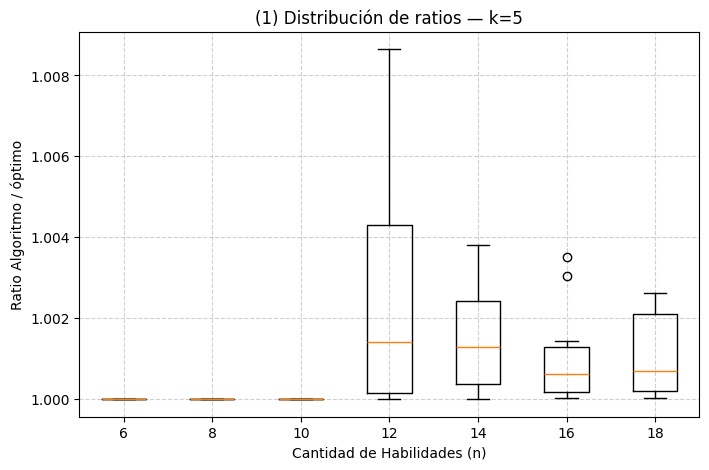

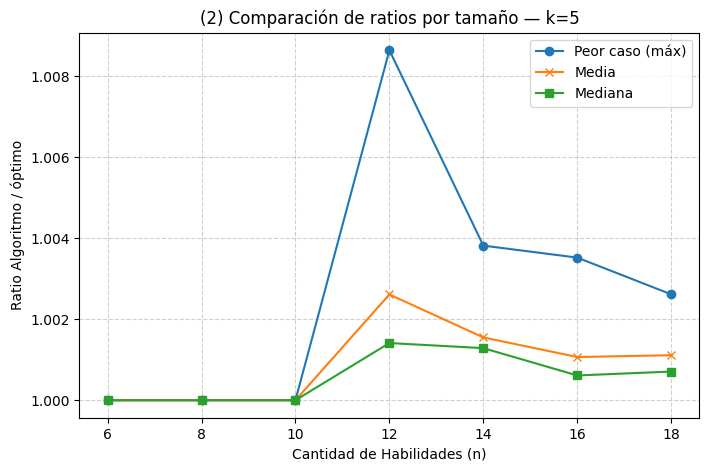

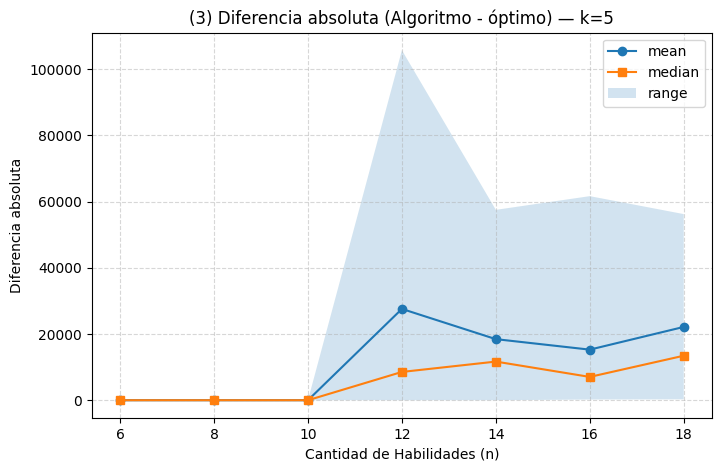

In [9]:
df = experimentar(k=K, ns=ns, algoritmo=greedy_pakku)
plot_boxplot_ratios(df, k=K, save_path="../informe/img/ratio_pakku_bt_1.png" )
plot_worst_vs_n(df, k=K,  save_path="../informe/img/ratio_pakku_bt_2.png")
plot_dif_absoluta(df, k=K,  save_path="../informe/img/ratio_pakku_bt_3.png")

### Greedy - FFD

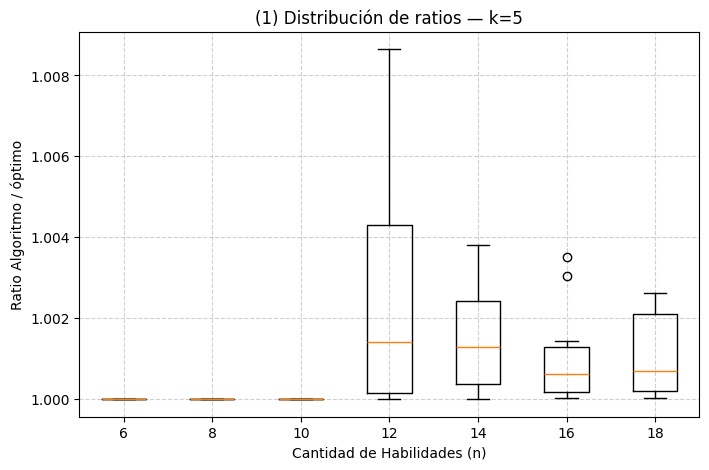

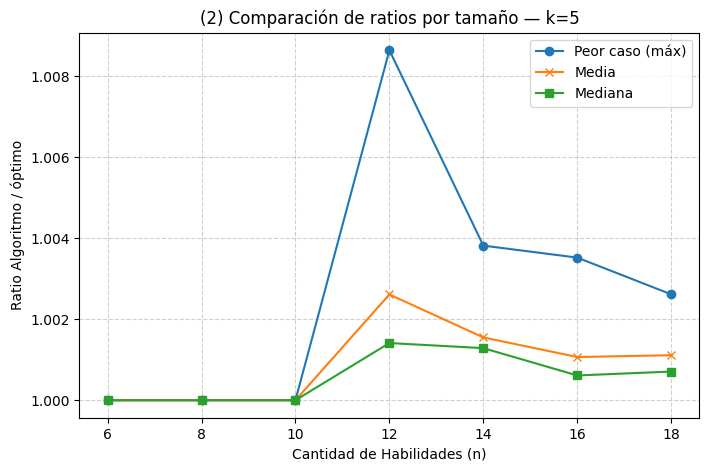

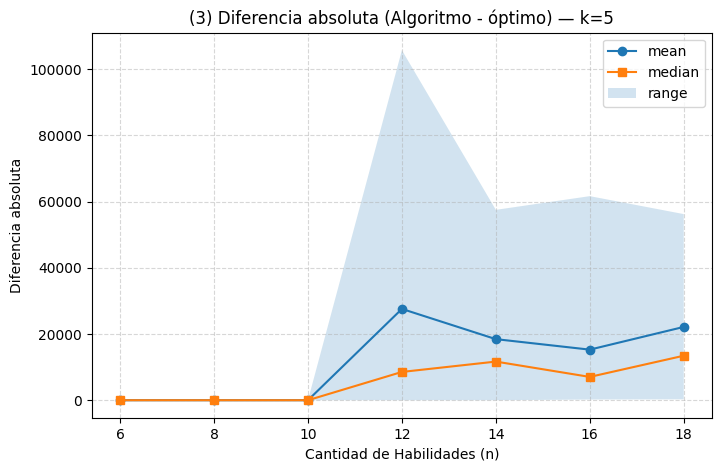

In [10]:
df = experimentar(k=K, ns=ns, algoritmo=greedy_ffd)
plot_boxplot_ratios(df, k=K, save_path="../informe/img/ratio_ffd_bt_1.png" )
plot_worst_vs_n(df, k=K,  save_path="../informe/img/ratio_ffd_bt_2.png")
plot_dif_absoluta(df, k=K,  save_path="../informe/img/ratio_ffd_bt_3.png")

### Programación Lineal

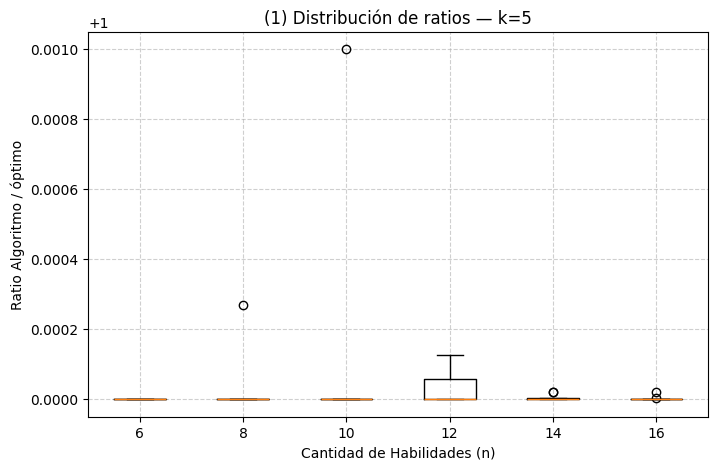

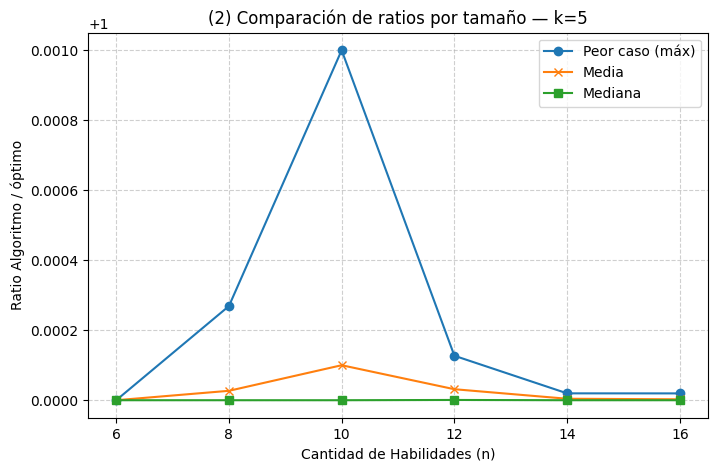

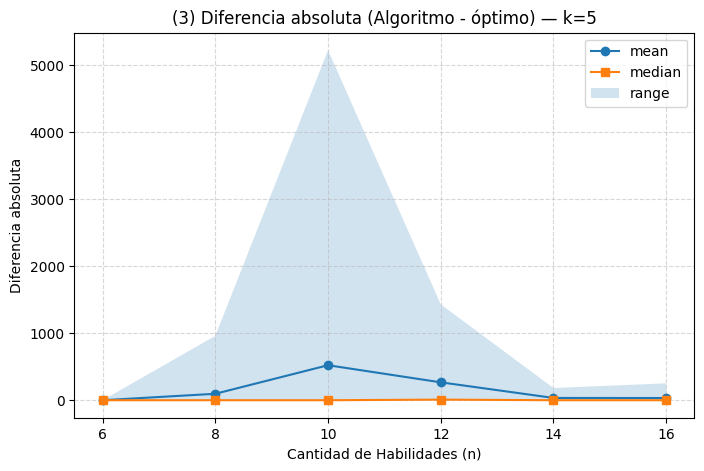

In [9]:
MAX_N = 18 #20
ns = list(range(MIN_N, MAX_N, SALTO))
df = experimentar(k=K, ns=ns, algoritmo=prog_lineal)
plot_boxplot_ratios(df, k=K, save_path="../informe/img/ratio_pl_bt_1.png" )
plot_worst_vs_n(df, k=K, save_path="../informe/img/ratio_pl_bt_2.png" )
plot_dif_absoluta(df, k=K, save_path="../informe/img/ratio_pl_bt_3.png" )